# 텐서플로우(google) - 산업용
* 이미지 관련 라이브러리
* keras를 이용해 코딩이 쉬움
* 순차적 sequentional, functional, class

# 파이토치(meta) - 연구용
* 자연어 관련 라이브러리
* 허깅페이스, 랭체인 
* class

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print(np.__version__)

1.26.4


In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/Taitanic_train.csv")
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
data = data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']]
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [8]:
data['family'] = data['SibSp'] + data['Parch']
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,family
0,0,3,male,22.0,1,0,S,1
1,1,1,female,38.0,1,0,C,1
2,1,3,female,26.0,0,0,S,0
3,1,1,female,35.0,1,0,S,1
4,0,3,male,35.0,0,0,S,0


In [9]:
data = data.drop(['SibSp', 'Parch'], axis=1)
data.head()

,Survived,Pclass,Sex,Age,Embarked,family
0,0,3,male,22.0,S,1
1,1,1,female,38.0,C,1
2,1,3,female,26.0,S,0
3,1,1,female,35.0,S,1
4,0,3,male,35.0,S,0


In [10]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [13]:
data['Embarked'].mode()[0]

'S'

In [14]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Embarked  891 non-null    object 
 5   family    891 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 41.9+ KB


In [17]:
data.head()

,Survived,Pclass,Sex,Age,Embarked,family
0,0,3,male,22.0,S,1
1,1,1,female,38.0,C,1
2,1,3,female,26.0,S,0
3,1,1,female,35.0,S,1
4,0,3,male,35.0,S,0


In [18]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,Survived,Pclass,Age,family,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,True,False,True
1,1,1,38.0,1,False,False,False
2,1,3,26.0,0,False,False,True
3,1,1,35.0,1,False,False,True
4,0,3,35.0,0,True,False,True


In [19]:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,Pclass,Age,family,Sex_male,Embarked_Q,Embarked_S
0,0.827377,-0.592481,0.059160,0.737695,-0.307562,0.615838
1,-1.566107,0.638789,0.059160,-1.355574,-0.307562,-1.623803
2,0.827377,-0.284663,-0.560975,-1.355574,-0.307562,0.615838
3,-1.566107,0.407926,0.059160,-1.355574,-0.307562,0.615838
4,0.827377,0.407926,-0.560975,0.737695,-0.307562,0.615838


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.7, random_state=10)

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [31]:
dtc = DecisionTreeClassifier(max_depth=3, random_state=10)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.85       386
           1       0.80      0.67      0.73       238

    accuracy                           0.81       624
   macro avg       0.81      0.78      0.79       624
weighted avg       0.81      0.81      0.81       624



In [30]:
# for i in range(1, 20):
#     dtc = DecisionTreeClassifier(max_depth=i, random_state=10)
#     dtc.fit(X_train, y_train)
#     pred = dtc.predict(X_test)
#     print(i)
#     print(classification_report(y_test, pred))

# Tensorflow Sequential API를 사용한 순차적 모델

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## 딥러닝 신경망 모델 정의

In [35]:
X_train

,Pclass,Age,family,Sex_male,Embarked_Q,Embarked_S
247,-0.369365,-0.438572,0.679295,-1.355574,-0.307562,0.615838
5,0.827377,0.000000,-0.560975,0.737695,3.251373,-1.623803
563,0.827377,0.000000,-0.560975,0.737695,-0.307562,0.615838
636,0.827377,0.177063,-0.560975,0.737695,-0.307562,0.615838
145,-0.369365,-0.823344,0.679295,0.737695,-0.307562,0.615838
...,...,...,...,...,...,...
369,-1.566107,-0.438572,-0.560975,-1.355574,-0.307562,-1.623803
320,0.827377,-0.592481,-0.560975,0.737695,-0.307562,0.615838
527,-1.566107,0.000000,-0.560975,0.737695,-0.307562,0.615838
125,0.827377,-1.362024,0.059160,0.737695,-0.307562,-1.623803


In [34]:
X_train.shape[1]

6

In [36]:
# 신경망 모델 정의
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu')) # 입력층, input_dim: 독립변수의 컬럼 수
model.add(Dense(64, activation='relu')) # 은닉층 1
model.add(Dense(32, activation='relu')) # 은닉층 2
model.add(Dense(16, activation='relu')) # 은닉층 3
model.add(Dense(1, activation='sigmoid')) # 출력층, 이진분류: sigmoid

2024-09-09 12:40:04.603996: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-09 12:40:04.605860: I tensorflow/c/logging.cc:34] DirectML: creating device on adapter 0 (AMD Radeon(TM) RX Vega 11 Graphics)
2024-09-09 12:40:04.798012: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 12:40:04.798105: W tensorflow/core/common_runtime/pluggable_device/pluggable_device_bfc_allocator.cc:28] Overriding allow_growth setting because force_memory_growth was requested by the device.
2024-09-09 12:40:04.798132: I tensorflow/core/common_runtime/pluggable_device/pluggab

# 모델 파라미터 세팅 model.compile()
* loss: 오차 계산 지표 
  * 이진분류: binary_crossentropy
  * 다중분류: categorical_crossentropy
  * 데이터에 0이 많은 희소행렬인 경우: sparse_categorical_crossentropy
  * 연속형데이터(회귀분석): mse
* optimizer: learning_rate
  * adam 을 가장 많이 사용

In [37]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                224       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 4,961
Trainable params: 4,961
Non-trainable params: 0
_________________________________________________________________


# 모델 훈련
* epochs: 전체 데이터를 한 번 훈련 하는 주기
* batch_size: 전체 데이터를 쪼개서 훈련, 메모리에 맞춰서 크기 조절
* validation_data: 검증 데이터로 모델 검증실시

In [39]:
history = model.fit(X_train, y_train, epochs = 200, batch_size=40, validation_data=(X_test, y_test))

Epoch 1/200


2024-09-09 14:14:43.821158: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-09 14:14:43.919975: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 14:14:43.920069: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15603 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


7/7 [==============================] - 1s 64ms/step - loss: 0.6834 - accuracy: 0.5243 - val_loss: 0.6707 - val_accuracy: 0.6827
Epoch 2/200
4/7 [================>.............] - ETA: 0s - loss: 0.6549 - accuracy: 0.7312

2024-09-09 14:14:44.595801: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-09 14:14:44.629558: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 14:14:44.629639: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15603 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


7/7 [==============================] - 0s 36ms/step - loss: 0.6475 - accuracy: 0.7640 - val_loss: 0.6432 - val_accuracy: 0.7468
Epoch 3/200
7/7 [==============================] - 0s 33ms/step - loss: 0.6134 - accuracy: 0.8090 - val_loss: 0.6117 - val_accuracy: 0.7756
Epoch 4/200
7/7 [==============================] - 0s 34ms/step - loss: 0.5741 - accuracy: 0.8202 - val_loss: 0.5785 - val_accuracy: 0.7821
Epoch 5/200
7/7 [==============================] - 0s 34ms/step - loss: 0.5340 - accuracy: 0.8315 - val_loss: 0.5428 - val_accuracy: 0.7965
Epoch 6/200
7/7 [==============================] - 0s 38ms/step - loss: 0.4943 - accuracy: 0.8277 - val_loss: 0.5079 - val_accuracy: 0.8013
Epoch 7/200
7/7 [==============================] - 0s 34ms/step - loss: 0.4601 - accuracy: 0.8352 - val_loss: 0.4799 - val_accuracy: 0.8061
Epoch 8/200
7/7 [==============================] - 0s 33ms/step - loss: 0.4287 - accuracy: 0.8277 - val_loss: 0.4660 - val_accuracy: 0.8045
Epoch 9/200
7/7 [===============

7/7 [==============================] - 0s 36ms/step - loss: 0.3027 - accuracy: 0.8727 - val_loss: 0.4836 - val_accuracy: 0.8013
Epoch 61/200
7/7 [==============================] - 0s 38ms/step - loss: 0.3001 - accuracy: 0.8801 - val_loss: 0.4901 - val_accuracy: 0.7981
Epoch 62/200
7/7 [==============================] - 0s 36ms/step - loss: 0.3004 - accuracy: 0.8764 - val_loss: 0.4965 - val_accuracy: 0.8045
Epoch 63/200
7/7 [==============================] - 0s 40ms/step - loss: 0.3002 - accuracy: 0.8689 - val_loss: 0.4942 - val_accuracy: 0.7997
Epoch 64/200
7/7 [==============================] - 0s 37ms/step - loss: 0.2973 - accuracy: 0.8801 - val_loss: 0.4959 - val_accuracy: 0.8013
Epoch 65/200
7/7 [==============================] - 0s 39ms/step - loss: 0.2989 - accuracy: 0.8727 - val_loss: 0.4932 - val_accuracy: 0.7997
Epoch 66/200
7/7 [==============================] - 0s 59ms/step - loss: 0.2955 - accuracy: 0.8764 - val_loss: 0.4949 - val_accuracy: 0.8029
Epoch 67/200
7/7 [========

7/7 [==============================] - 0s 59ms/step - loss: 0.2638 - accuracy: 0.8951 - val_loss: 0.5769 - val_accuracy: 0.7917
Epoch 119/200
7/7 [==============================] - 0s 42ms/step - loss: 0.2598 - accuracy: 0.8914 - val_loss: 0.5828 - val_accuracy: 0.7965
Epoch 120/200
7/7 [==============================] - 0s 35ms/step - loss: 0.2673 - accuracy: 0.8876 - val_loss: 0.5803 - val_accuracy: 0.7933
Epoch 121/200
7/7 [==============================] - 0s 36ms/step - loss: 0.2620 - accuracy: 0.8951 - val_loss: 0.5824 - val_accuracy: 0.7981
Epoch 122/200
7/7 [==============================] - 0s 43ms/step - loss: 0.2595 - accuracy: 0.8876 - val_loss: 0.5837 - val_accuracy: 0.7933
Epoch 123/200
7/7 [==============================] - 0s 43ms/step - loss: 0.2614 - accuracy: 0.8914 - val_loss: 0.5852 - val_accuracy: 0.7933
Epoch 124/200
7/7 [==============================] - 0s 38ms/step - loss: 0.2601 - accuracy: 0.8839 - val_loss: 0.5898 - val_accuracy: 0.7997
Epoch 125/200
7/7 [=

Epoch 176/200
7/7 [==============================] - 0s 36ms/step - loss: 0.2547 - accuracy: 0.8989 - val_loss: 0.6686 - val_accuracy: 0.7837
Epoch 177/200
7/7 [==============================] - 0s 35ms/step - loss: 0.2553 - accuracy: 0.8914 - val_loss: 0.6678 - val_accuracy: 0.7917
Epoch 178/200
7/7 [==============================] - 0s 34ms/step - loss: 0.2433 - accuracy: 0.8989 - val_loss: 0.6643 - val_accuracy: 0.7901
Epoch 179/200
7/7 [==============================] - 0s 35ms/step - loss: 0.2455 - accuracy: 0.8989 - val_loss: 0.6737 - val_accuracy: 0.7917
Epoch 180/200
7/7 [==============================] - 0s 35ms/step - loss: 0.2462 - accuracy: 0.8951 - val_loss: 0.6727 - val_accuracy: 0.7997
Epoch 181/200
7/7 [==============================] - 0s 34ms/step - loss: 0.2438 - accuracy: 0.8951 - val_loss: 0.6699 - val_accuracy: 0.7949
Epoch 182/200
7/7 [==============================] - 0s 41ms/step - loss: 0.2424 - accuracy: 0.9064 - val_loss: 0.6869 - val_accuracy: 0.7981
Epoch 

# 딥러닝 모델 성능 평가
* 딥러닝에서 모델의 성능을 평가하는 지표는 loss
* 보통 loss가 낮으면 accuracy가 올라가지만 비례하지 않을 때도 있음.
* 두 지표간에 차이가 있을 경우 loss가 낮은 모델이 우수한 모델

In [46]:
score = model.evaluate(X_test, y_test)
print('test loss', score[0])
print('test accuracy', score[1])

20/20 [==============================] - 0s 10ms/step - loss: 0.7225 - accuracy: 0.7901
test loss 0.7225427031517029
test accuracy 0.7900640964508057


# 딥러닝 학습결과 시각화

In [45]:
history.history.keys()plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

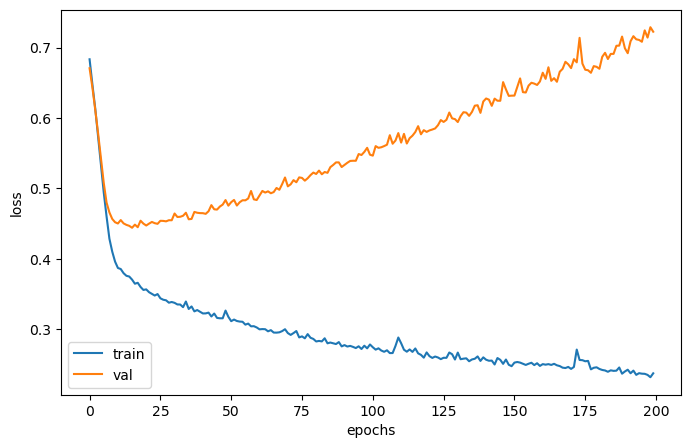

In [64]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [58]:
pred = model.predict(X_test)
pred

20/20 [==============================] - 0s 5ms/step


array([[7.87951723e-02],
       [1.23051025e-01],
       [1.06016971e-01],
       [9.98444378e-01],
       [9.99309659e-01],
       [1.70856506e-01],
       [1.06481560e-01],
       [3.50535698e-02],
       [8.79963413e-02],
       [1.02316774e-01],
       [2.06134357e-02],
       [9.99717176e-01],
       [3.76178265e-01],
       [2.79843569e-01],
       [2.81864479e-02],
       [2.93967314e-02],
       [1.80100278e-06],
       [3.39919388e-01],
       [4.99189734e-01],
       [1.88133687e-01],
       [9.39639937e-03],
       [2.05087904e-02],
       [9.63300765e-01],
       [5.78333531e-03],
       [9.99960542e-01],
       [1.23051025e-01],
       [1.23051025e-01],
       [8.59648645e-01],
       [3.72873247e-02],
       [9.99989629e-01],
       [9.99309659e-01],
       [2.93967314e-02],
       [9.41794395e-01],
       [1.24777784e-03],
       [9.99984503e-01],
       [7.40918666e-02],
       [4.50616926e-01],
       [3.01281805e-04],
       [8.67130011e-02],
       [8.79963413e-02],


In [59]:
pred = pd.DataFrame(pred)
pred

,0
0,0.078795
1,0.123051
2,0.106017
3,0.998444
4,0.999310
...,...
619,0.042760
620,0.999990
621,0.040474
622,0.064756


In [60]:
pred = pred[0].apply(lambda x: 1 if x >= 0.3 else 0)
pred

0      0
1      0
2      0
3      1
4      1
      ..
619    0
620    1
621    0
622    0
623    0
Name: 0, Length: 624, dtype: int64

In [61]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       386
           1       0.72      0.74      0.73       238

    accuracy                           0.79       624
   macro avg       0.78      0.78      0.78       624
weighted avg       0.79      0.79      0.79       624



# Tensorflow Functional API를 이용한 함수형 모델
* Sequential API는 단순히 층을 여러 개 쌓는 형태라 복잡한 모델 생성에 한계가 있어
* Functional API는 입력층과 출력층을 사용자가 직접 정의 가능
* 다중입력(Multi-input), 다중출력(Multi-output)등 복잡한 모델을 정의 할 수 있음
* Input(shape=(독립변수 수))로 입력층 정의
* 이전 층을 다음 층의 입력으로 사용
* model()에 입력과 출력 정의

In [65]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [71]:
inputs = Input(shape=(X_train.shape[1], )) # 입력층 정의 Input(shape=(독립변수 수, ))
x = Dense(32, activation='relu')(inputs) # 은닉층 1번
x = Dense(64, activation='relu')(x) # 은닉층 2번
x = Dense(32, activation='relu')(x) # 은닉층 3번
x = Dense(16, activation='relu')(x) # 은닉층 4번
x = Dense(1, activation='sigmoid')(x) # 출력층
model = Model(inputs, x)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense_16 (Dense)            (None, 32)                224       
                                                                 
 dense_17 (Dense)            (None, 64)                2112      
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 dense_20 (Dense)            (None, 1)                 17        
                                                                 
Total params: 4,961
Trainable params: 4,961
Non-trainable p

In [68]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=400, batch_size=100, validation_data=(X_test, y_test))
pred = model.predict(X_test)
pred = pd.DataFrame(pred)
pred = pred[0].apply(lambda x: 1 if x > 0.5 else 0)
print(classification_report(y_test, pred))

Epoch 1/400
1/3 [=========>....................] - ETA: 1s - loss: 0.7191 - accuracy: 0.4200

2024-09-09 15:21:26.991013: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-09 15:21:27.077004: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 15:21:27.077095: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15603 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


3/3 [==============================] - 1s 147ms/step - loss: 0.7039 - accuracy: 0.4157 - val_loss: 0.6876 - val_accuracy: 0.4583
Epoch 2/400
1/3 [=========>....................] - ETA: 0s - loss: 0.6822 - accuracy: 0.5100

2024-09-09 15:21:27.388925: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-09 15:21:27.426243: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 15:21:27.426311: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15603 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


3/3 [==============================] - 0s 60ms/step - loss: 0.6792 - accuracy: 0.5206 - val_loss: 0.6716 - val_accuracy: 0.6186
Epoch 3/400
3/3 [==============================] - 0s 56ms/step - loss: 0.6610 - accuracy: 0.7678 - val_loss: 0.6574 - val_accuracy: 0.7724
Epoch 4/400
3/3 [==============================] - 0s 55ms/step - loss: 0.6447 - accuracy: 0.8165 - val_loss: 0.6452 - val_accuracy: 0.7853
Epoch 5/400
3/3 [==============================] - 0s 56ms/step - loss: 0.6284 - accuracy: 0.8277 - val_loss: 0.6324 - val_accuracy: 0.7901
Epoch 6/400
3/3 [==============================] - 0s 62ms/step - loss: 0.6125 - accuracy: 0.8240 - val_loss: 0.6189 - val_accuracy: 0.7885
Epoch 7/400
3/3 [==============================] - 0s 59ms/step - loss: 0.5955 - accuracy: 0.8202 - val_loss: 0.6042 - val_accuracy: 0.7885
Epoch 8/400
3/3 [==============================] - 0s 66ms/step - loss: 0.5764 - accuracy: 0.8240 - val_loss: 0.5886 - val_accuracy: 0.7981
Epoch 9/400
3/3 [===============

3/3 [==============================] - 0s 71ms/step - loss: 0.3167 - accuracy: 0.8764 - val_loss: 0.4711 - val_accuracy: 0.8109
Epoch 61/400
3/3 [==============================] - 0s 109ms/step - loss: 0.3160 - accuracy: 0.8764 - val_loss: 0.4711 - val_accuracy: 0.8109
Epoch 62/400
3/3 [==============================] - 0s 80ms/step - loss: 0.3152 - accuracy: 0.8764 - val_loss: 0.4719 - val_accuracy: 0.8109
Epoch 63/400
3/3 [==============================] - 0s 89ms/step - loss: 0.3134 - accuracy: 0.8652 - val_loss: 0.4747 - val_accuracy: 0.8061
Epoch 64/400
3/3 [==============================] - 0s 69ms/step - loss: 0.3133 - accuracy: 0.8689 - val_loss: 0.4782 - val_accuracy: 0.8045
Epoch 65/400
3/3 [==============================] - 0s 59ms/step - loss: 0.3118 - accuracy: 0.8764 - val_loss: 0.4810 - val_accuracy: 0.8093
Epoch 66/400
3/3 [==============================] - 0s 63ms/step - loss: 0.3132 - accuracy: 0.8727 - val_loss: 0.4815 - val_accuracy: 0.8093
Epoch 67/400
3/3 [=======

Epoch 118/400
3/3 [==============================] - 0s 58ms/step - loss: 0.2757 - accuracy: 0.8801 - val_loss: 0.5599 - val_accuracy: 0.8045
Epoch 119/400
3/3 [==============================] - 0s 55ms/step - loss: 0.2761 - accuracy: 0.8801 - val_loss: 0.5605 - val_accuracy: 0.7965
Epoch 120/400
3/3 [==============================] - 0s 53ms/step - loss: 0.2739 - accuracy: 0.8801 - val_loss: 0.5599 - val_accuracy: 0.7965
Epoch 121/400
3/3 [==============================] - 0s 58ms/step - loss: 0.2740 - accuracy: 0.8876 - val_loss: 0.5606 - val_accuracy: 0.7965
Epoch 122/400
3/3 [==============================] - 0s 57ms/step - loss: 0.2726 - accuracy: 0.8876 - val_loss: 0.5636 - val_accuracy: 0.7981
Epoch 123/400
3/3 [==============================] - 0s 57ms/step - loss: 0.2734 - accuracy: 0.8801 - val_loss: 0.5669 - val_accuracy: 0.7997
Epoch 124/400
3/3 [==============================] - 0s 57ms/step - loss: 0.2728 - accuracy: 0.8839 - val_loss: 0.5686 - val_accuracy: 0.7997
Epoch 

Epoch 176/400
3/3 [==============================] - 0s 57ms/step - loss: 0.2553 - accuracy: 0.8876 - val_loss: 0.6395 - val_accuracy: 0.7997
Epoch 177/400
3/3 [==============================] - 0s 55ms/step - loss: 0.2543 - accuracy: 0.8914 - val_loss: 0.6399 - val_accuracy: 0.7965
Epoch 178/400
3/3 [==============================] - 0s 59ms/step - loss: 0.2531 - accuracy: 0.8914 - val_loss: 0.6404 - val_accuracy: 0.7965
Epoch 179/400
3/3 [==============================] - 0s 53ms/step - loss: 0.2537 - accuracy: 0.8951 - val_loss: 0.6389 - val_accuracy: 0.7949
Epoch 180/400
3/3 [==============================] - 0s 103ms/step - loss: 0.2532 - accuracy: 0.8876 - val_loss: 0.6427 - val_accuracy: 0.7981
Epoch 181/400
3/3 [==============================] - 0s 81ms/step - loss: 0.2531 - accuracy: 0.8914 - val_loss: 0.6391 - val_accuracy: 0.7949
Epoch 182/400
3/3 [==============================] - 0s 61ms/step - loss: 0.2523 - accuracy: 0.8914 - val_loss: 0.6391 - val_accuracy: 0.7981
Epoch

Epoch 234/400
3/3 [==============================] - 0s 102ms/step - loss: 0.2380 - accuracy: 0.8951 - val_loss: 0.7128 - val_accuracy: 0.8013
Epoch 235/400
3/3 [==============================] - 0s 84ms/step - loss: 0.2387 - accuracy: 0.8989 - val_loss: 0.7167 - val_accuracy: 0.7997
Epoch 236/400
3/3 [==============================] - 0s 62ms/step - loss: 0.2385 - accuracy: 0.8914 - val_loss: 0.7220 - val_accuracy: 0.7965
Epoch 237/400
3/3 [==============================] - 0s 95ms/step - loss: 0.2391 - accuracy: 0.8914 - val_loss: 0.7187 - val_accuracy: 0.7997
Epoch 238/400
3/3 [==============================] - 0s 79ms/step - loss: 0.2387 - accuracy: 0.8989 - val_loss: 0.7200 - val_accuracy: 0.8013
Epoch 239/400
3/3 [==============================] - 0s 103ms/step - loss: 0.2384 - accuracy: 0.8989 - val_loss: 0.7189 - val_accuracy: 0.7981
Epoch 240/400
3/3 [==============================] - 0s 85ms/step - loss: 0.2371 - accuracy: 0.8989 - val_loss: 0.7212 - val_accuracy: 0.7997
Epoc

3/3 [==============================] - 0s 59ms/step - loss: 0.2247 - accuracy: 0.8951 - val_loss: 0.7961 - val_accuracy: 0.7949
Epoch 292/400
3/3 [==============================] - 0s 67ms/step - loss: 0.2236 - accuracy: 0.8989 - val_loss: 0.7976 - val_accuracy: 0.7965
Epoch 293/400
3/3 [==============================] - 0s 67ms/step - loss: 0.2223 - accuracy: 0.8989 - val_loss: 0.7989 - val_accuracy: 0.7949
Epoch 294/400
3/3 [==============================] - 0s 120ms/step - loss: 0.2238 - accuracy: 0.8951 - val_loss: 0.7969 - val_accuracy: 0.7949
Epoch 295/400
3/3 [==============================] - 0s 76ms/step - loss: 0.2236 - accuracy: 0.9026 - val_loss: 0.7989 - val_accuracy: 0.7981
Epoch 296/400
3/3 [==============================] - 0s 58ms/step - loss: 0.2225 - accuracy: 0.8989 - val_loss: 0.8034 - val_accuracy: 0.7949
Epoch 297/400
3/3 [==============================] - 0s 54ms/step - loss: 0.2235 - accuracy: 0.9026 - val_loss: 0.8057 - val_accuracy: 0.7949
Epoch 298/400
3/3 [

Epoch 349/400
3/3 [==============================] - 0s 63ms/step - loss: 0.2161 - accuracy: 0.8951 - val_loss: 0.9176 - val_accuracy: 0.7885
Epoch 350/400
3/3 [==============================] - 0s 66ms/step - loss: 0.2073 - accuracy: 0.9101 - val_loss: 0.9189 - val_accuracy: 0.7949
Epoch 351/400
3/3 [==============================] - 0s 65ms/step - loss: 0.2138 - accuracy: 0.9026 - val_loss: 0.9162 - val_accuracy: 0.7901
Epoch 352/400
3/3 [==============================] - 0s 51ms/step - loss: 0.2095 - accuracy: 0.8989 - val_loss: 0.9099 - val_accuracy: 0.7933
Epoch 353/400
3/3 [==============================] - 0s 59ms/step - loss: 0.2125 - accuracy: 0.9064 - val_loss: 0.9081 - val_accuracy: 0.7901
Epoch 354/400
3/3 [==============================] - 0s 70ms/step - loss: 0.2081 - accuracy: 0.9026 - val_loss: 0.9268 - val_accuracy: 0.7981
Epoch 355/400
3/3 [==============================] - 0s 62ms/step - loss: 0.2159 - accuracy: 0.9064 - val_loss: 0.9247 - val_accuracy: 0.7949
Epoch 

2024-09-09 15:22:33.548957: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


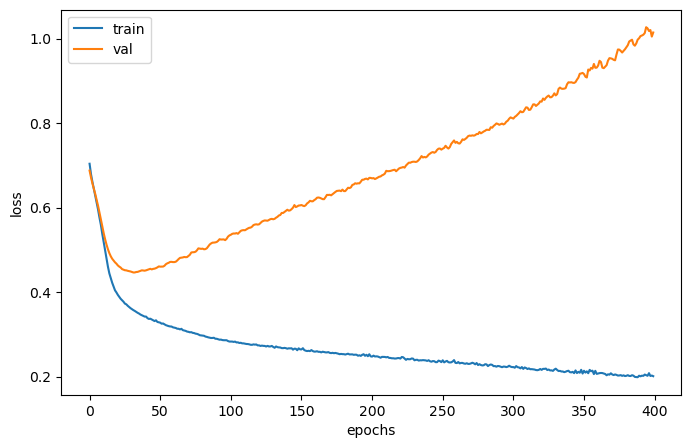

In [69]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# Model Subclassing API로 모델 만들기
* class 형태의 모델 정의 방법
* tf.keras.Model을 상속받아 작성

In [72]:
class Titanic(tf.keras.Model):
    def __init__(self):
        super(Titanic, self).__init__()
        self.dense1 = tf.keras.layers.Dense(32, activation='relu')
        self.dense2 = tf.keras.layers.Dense(64, activation='relu')
        self.dense3 = tf.keras.layers.Dense(16, activation='relu')
        self.classifier = tf.keras.layers.Dense(1, activation='sigmoid')
    
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        return self.classifier(x)

In [73]:
model = Titanic()

In [77]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=200, batch_size=500, validation_data=(X_test, y_test))
pred = model.predict(X_test)
pred = pd.DataFrame(pred)
pred = pred[0].apply(lambda x: 1 if x > 5 else 0)
print(classification_report(y_test, pred))

Epoch 1/200


2024-09-09 15:47:35.316181: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-09 15:47:35.392357: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 15:47:35.392425: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15603 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


1/1 [==============================] - 2s 2s/step - loss: 0.7225 - accuracy: 0.3895 - val_loss: 0.7200 - val_accuracy: 0.4135
Epoch 2/200
1/1 [==============================] - 0s 80ms/step - loss: 0.7109 - accuracy: 0.4419 - val_loss: 0.7104 - val_accuracy: 0.4279
Epoch 3/200
1/1 [==============================] - ETA: 0s - loss: 0.7001 - accuracy: 0.4757

2024-09-09 15:47:36.163717: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-09 15:47:36.194286: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 15:47:36.194355: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15603 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


1/1 [==============================] - 0s 96ms/step - loss: 0.7001 - accuracy: 0.4757 - val_loss: 0.7017 - val_accuracy: 0.4583
Epoch 4/200
1/1 [==============================] - 0s 89ms/step - loss: 0.6907 - accuracy: 0.5094 - val_loss: 0.6936 - val_accuracy: 0.4888
Epoch 5/200
1/1 [==============================] - 0s 91ms/step - loss: 0.6819 - accuracy: 0.5356 - val_loss: 0.6862 - val_accuracy: 0.5080
Epoch 6/200
1/1 [==============================] - 0s 84ms/step - loss: 0.6738 - accuracy: 0.5543 - val_loss: 0.6795 - val_accuracy: 0.5321
Epoch 7/200
1/1 [==============================] - 0s 92ms/step - loss: 0.6668 - accuracy: 0.5730 - val_loss: 0.6730 - val_accuracy: 0.5705
Epoch 8/200
1/1 [==============================] - 0s 93ms/step - loss: 0.6600 - accuracy: 0.6217 - val_loss: 0.6666 - val_accuracy: 0.6442
Epoch 9/200
1/1 [==============================] - 0s 99ms/step - loss: 0.6535 - accuracy: 0.7154 - val_loss: 0.6604 - val_accuracy: 0.7163
Epoch 10/200
1/1 [==============

1/1 [==============================] - 0s 89ms/step - loss: 0.3876 - accuracy: 0.8240 - val_loss: 0.4500 - val_accuracy: 0.7917
Epoch 62/200
1/1 [==============================] - 0s 76ms/step - loss: 0.3860 - accuracy: 0.8240 - val_loss: 0.4489 - val_accuracy: 0.7917
Epoch 63/200
1/1 [==============================] - 0s 87ms/step - loss: 0.3845 - accuracy: 0.8277 - val_loss: 0.4479 - val_accuracy: 0.7933
Epoch 64/200
1/1 [==============================] - 0s 86ms/step - loss: 0.3830 - accuracy: 0.8315 - val_loss: 0.4470 - val_accuracy: 0.7933
Epoch 65/200
1/1 [==============================] - 0s 77ms/step - loss: 0.3816 - accuracy: 0.8315 - val_loss: 0.4463 - val_accuracy: 0.7933
Epoch 66/200
1/1 [==============================] - 0s 84ms/step - loss: 0.3802 - accuracy: 0.8315 - val_loss: 0.4456 - val_accuracy: 0.7933
Epoch 67/200
1/1 [==============================] - 0s 85ms/step - loss: 0.3789 - accuracy: 0.8315 - val_loss: 0.4450 - val_accuracy: 0.7981
Epoch 68/200
1/1 [========

1/1 [==============================] - 0s 82ms/step - loss: 0.3325 - accuracy: 0.8614 - val_loss: 0.4509 - val_accuracy: 0.8109
Epoch 120/200
1/1 [==============================] - 0s 83ms/step - loss: 0.3318 - accuracy: 0.8614 - val_loss: 0.4514 - val_accuracy: 0.8109
Epoch 121/200
1/1 [==============================] - 0s 89ms/step - loss: 0.3311 - accuracy: 0.8652 - val_loss: 0.4518 - val_accuracy: 0.8125
Epoch 122/200
1/1 [==============================] - 0s 100ms/step - loss: 0.3305 - accuracy: 0.8689 - val_loss: 0.4523 - val_accuracy: 0.8125
Epoch 123/200
1/1 [==============================] - 0s 85ms/step - loss: 0.3298 - accuracy: 0.8689 - val_loss: 0.4527 - val_accuracy: 0.8157
Epoch 124/200
1/1 [==============================] - 0s 88ms/step - loss: 0.3291 - accuracy: 0.8689 - val_loss: 0.4531 - val_accuracy: 0.8157
Epoch 125/200
1/1 [==============================] - 0s 87ms/step - loss: 0.3285 - accuracy: 0.8689 - val_loss: 0.4535 - val_accuracy: 0.8157
Epoch 126/200
1/1 [

Epoch 177/200
1/1 [==============================] - 0s 85ms/step - loss: 0.3006 - accuracy: 0.8801 - val_loss: 0.4754 - val_accuracy: 0.8109
Epoch 178/200
1/1 [==============================] - 0s 90ms/step - loss: 0.3002 - accuracy: 0.8801 - val_loss: 0.4759 - val_accuracy: 0.8109
Epoch 179/200
1/1 [==============================] - 0s 80ms/step - loss: 0.2998 - accuracy: 0.8801 - val_loss: 0.4764 - val_accuracy: 0.8109
Epoch 180/200
1/1 [==============================] - 0s 93ms/step - loss: 0.2993 - accuracy: 0.8801 - val_loss: 0.4770 - val_accuracy: 0.8109
Epoch 181/200
1/1 [==============================] - 0s 96ms/step - loss: 0.2989 - accuracy: 0.8801 - val_loss: 0.4775 - val_accuracy: 0.8109
Epoch 182/200
1/1 [==============================] - 0s 88ms/step - loss: 0.2984 - accuracy: 0.8801 - val_loss: 0.4780 - val_accuracy: 0.8109
Epoch 183/200
1/1 [==============================] - 0s 80ms/step - loss: 0.2980 - accuracy: 0.8801 - val_loss: 0.4784 - val_accuracy: 0.8125
Epoch 

2024-09-09 15:47:55.819793: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/home/user/miniforge3/envs/dml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/user/miniforge3/envs/dml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/user/miniforge3/envs/dml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in 

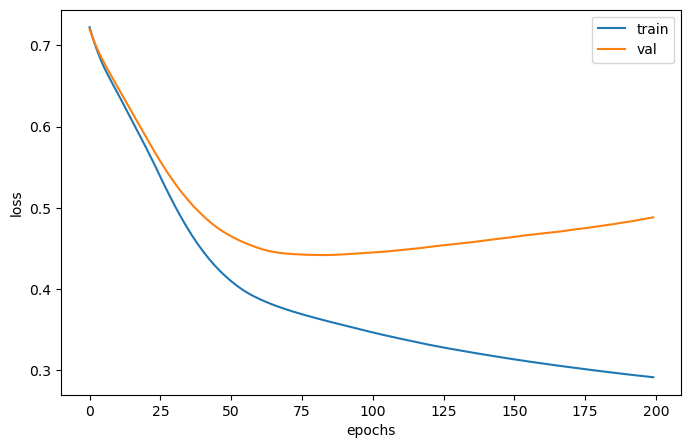

In [78]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()